## Creating a EfficientNetB3 with actual data

In [2]:
#Lets import all packages again just that we have everything we need

import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True # important to avoir an error (the truncated picture error)
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
X = np.load("processed/X.npy")
y = np.load("processed/y.npy")

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Plotting images to see if our data is correct

/Users/alex/.pyenv/versions/fungai/lib/python3.10/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


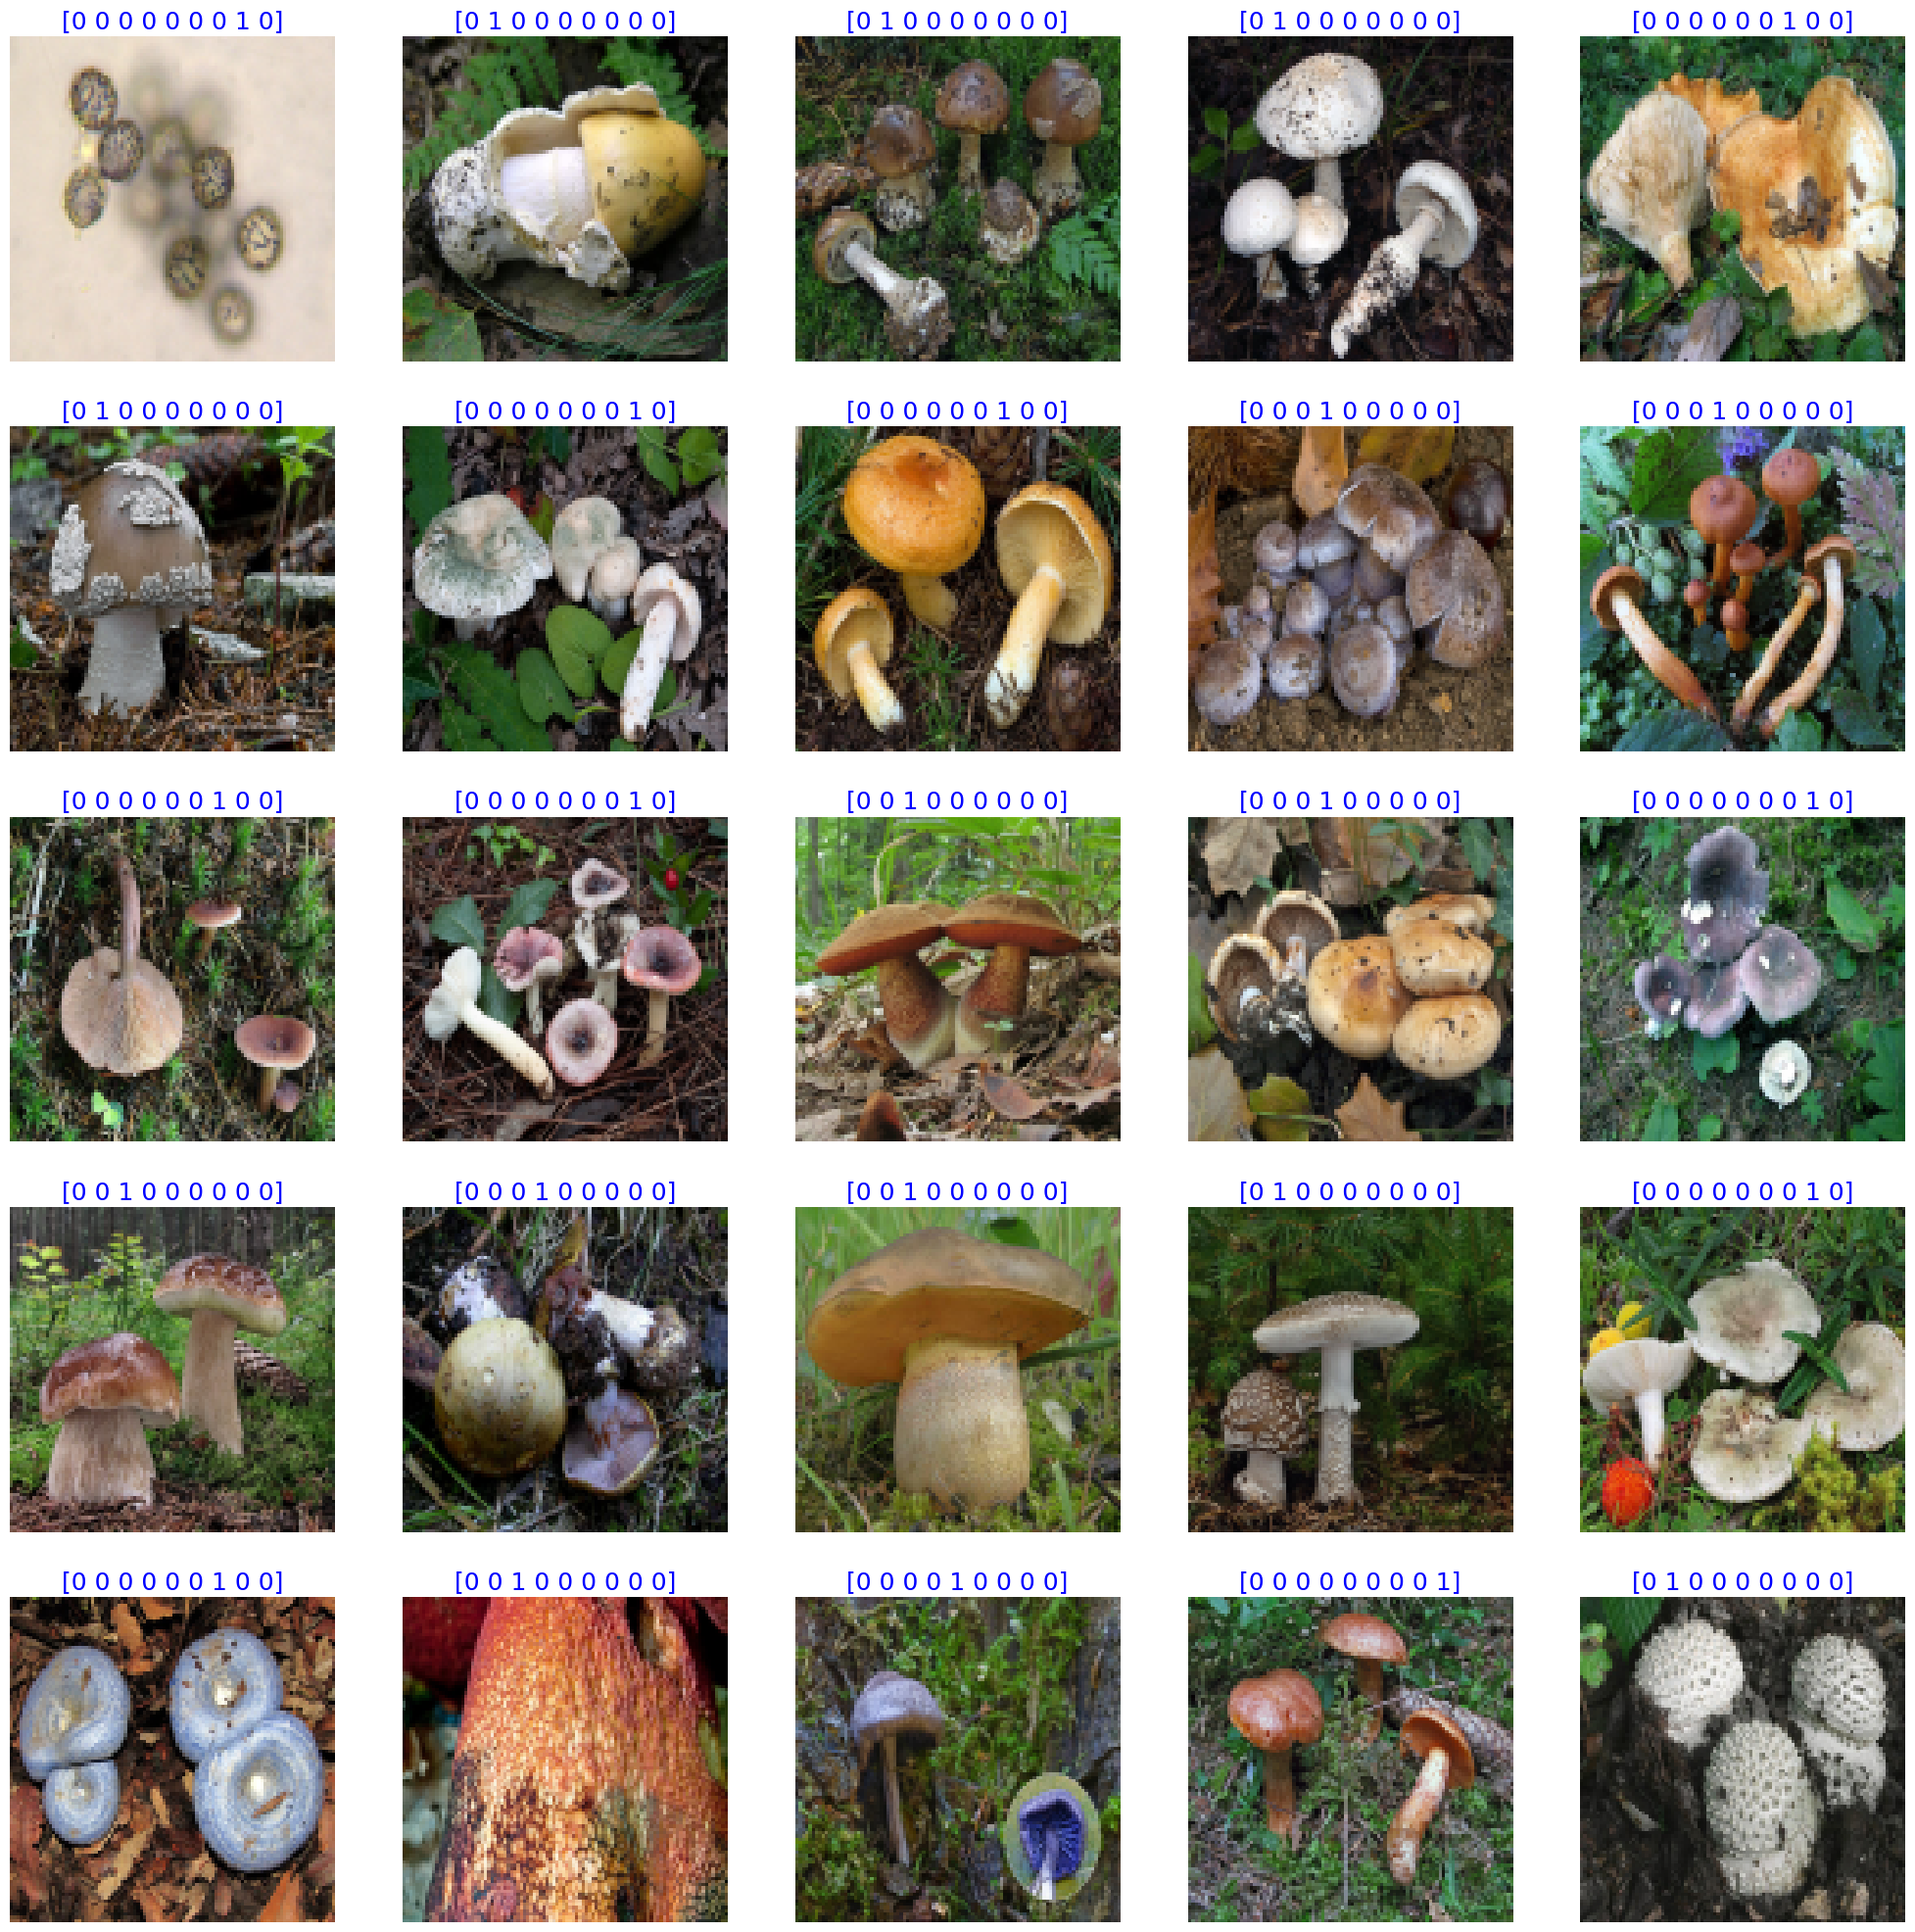

In [8]:
def show_image_samples(image,label):
    
    images,labels=image,label # get a sample batch from the generator 
    plt.figure(figsize=(25, 25))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        image=images[i]      
        plt.imshow(image)
        plt.title(label[i], color='blue', fontsize=18)
        plt.axis('off')
    plt.show()
    
show_image_samples(X_train,y_train)

### Creating the Model

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [16]:
img_size =X_train[0].shape

In [17]:
def make_model(img_size, lr, mod_num=3):  
    
    img_shape=(img_size[0], img_size[1], 3)

    base_model=tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
    msg='Created EfficientNet B3 model'
   
    base_model.trainable=True
    x=base_model.output
    
    x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
    x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                    bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
    x=Dropout(rate=.4, seed=123)(x)       
    output=Dense(9, activation='softmax')(x)
    model=Model(inputs=base_model.input, outputs=output)
    model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy']) 
    msg=msg + f' with initial learning rate set to {lr}'
    
    return model

lr=.001
model=make_model(img_size, lr) # using B3 model by default

43941136/43941136 [==============================] - 2s 0us/step


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

epochs = 50
es = EarlyStopping(patience=10)
callbacks = [es]


In [19]:
history = model.fit(X_train,y_train, epochs=epochs, verbose=1, validation_data=(X_test,y_test), 
                    batch_size=32)

Epoch 1/50


2022-12-01 13:06:22.215132: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


147/147 [==============================] - 106s 666ms/step - loss: 8.8261 - accuracy: 0.3344 - val_loss: 7.8535 - val_accuracy: 0.2309
Epoch 2/50
147/147 [==============================] - 96s 655ms/step - loss: 6.2389 - accuracy: 0.5619 - val_loss: 6.7388 - val_accuracy: 0.2304
Epoch 3/50
147/147 [==============================] - 99s 672ms/step - loss: 4.6586 - accuracy: 0.7039 - val_loss: 5.3940 - val_accuracy: 0.1922
Epoch 4/50
147/147 [==============================] - 100s 680ms/step - loss: 3.4335 - accuracy: 0.8101 - val_loss: 4.3552 - val_accuracy: 0.2642
Epoch 5/50
147/147 [==============================] - 100s 684ms/step - loss: 2.4964 - accuracy: 0.8827 - val_loss: 3.3502 - val_accuracy: 0.4707
Epoch 6/50
147/147 [==============================] - 98s 668ms/step - loss: 1.8146 - accuracy: 0.9198 - val_loss: 3.4470 - val_accuracy: 0.2537
Epoch 7/50
147/147 [==============================] - 102s 695ms/step - loss: 1.3120 - accuracy: 0.9519 - val_loss: 2.1782 - val_accuracy:

KeyboardInterrupt: 